In [1]:
import nltk
import re
import os
import pandas as pd
from nltk.corpus import stopwords as stop
from nltk.stem import WordNetLemmatizer
import wordcloud as w
from collections import Counter
import matplotlib.pyplot as plot
from sklearn.feature_extraction.text import CountVectorizer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [117]:
import kagglehub

# The download directly via kaggle api comment change the path params: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/suggestions?status=pending&yourSuggestions=true
path = ''
#path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")
print(f'The path used is: {path}')

The path used is: 


In [118]:
if path != '':
    path = f'{path}/'
    
print(path)
covid_file = 'Corona_NLP_test.csv'
covid_dataset = pd.read_csv(f'{path}{covid_file}')

# First treat sentences, remove links and escapechars etc...
covid_tweets = covid_dataset['OriginalTweet'].to_list()

In [114]:

tweettimemin = covid_dataset['TweetAt'].min()
tweettimemax = covid_dataset['TweetAt'].max()
print(f"Tweets between: {tweettimemin} and  {tweettimemax}")

Tweets between: 02-03-2020 and  16-03-2020


In [4]:
# Clean ascii and carriage returns/newlines, ampersand to ampersand
escaped_char_removal = []
# if links need to be removed
url_pattern = r'https?://[^\s]+|www\.[^\s]+' 
for i in covid_tweets:
    i = re.sub(r'\\x[0-9A-Fa-f]{2}', '', i)
    i = re.sub(url_pattern, '', i)
    escaped_char_removal.append(i.replace('\r', '').replace('\n', '').replace('&amp', '&'))
    
print(escaped_char_removal)


['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up  ', "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. ", 'Find out how you can protect yourself and loved ones from #coronavirus. ?', '#Panic buying hits #NewYork City as anxious shoppers stock up on food&;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?#QAnon #QAnon2018 #QAnon2020 #Election2020 #CDC ', '#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    One week everyone buying baby milk powder the next everyone buying up toilet paper. ', 'Do you remember the last time you paid $2.99 a gallon for regular gas 

In [5]:
# into a single string
tweets_combined = ' '.join(escaped_char_removal)


In [6]:
twts = pd.DataFrame(escaped_char_removal)
twts.to_csv('output.csv')

In [7]:
# Fix missing nltk installs
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /home/joonas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/joonas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/joonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Fix ubuntu based ttf issue...
#font_path = '/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-Regular.ttf'
#print(os.path.isfile(font_path))

In [8]:
# Set stopwords list
stopwords = list(stop.words('english'))

In [9]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Create lemmatizer
lemmatizer = WordNetLemmatizer()

In [91]:
# tokenization separates each word or character to it's own entity in an arrayr
tokenized_tweets = nltk.word_tokenize(tweets_combined)
print(tokenized_tweets)

['TRENDING', ':', 'New', 'Yorkers', 'encounter', 'empty', 'supermarket', 'shelves', '(', 'pictured', ',', 'Wegmans', 'in', 'Brooklyn', ')', ',', 'sold-out', 'online', 'grocers', '(', 'FoodKick', ',', 'MaxDelivery', ')', 'as', '#', 'coronavirus-fearing', 'shoppers', 'stock', 'up', 'When', 'I', 'could', "n't", 'find', 'hand', 'sanitizer', 'at', 'Fred', 'Meyer', ',', 'I', 'turned', 'to', '#', 'Amazon', '.', 'But', '$', '114.97', 'for', 'a', '2', 'pack', 'of', 'Purell', '?', '?', '!', '!', 'Check', 'out', 'how', '#', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', '.', 'Find', 'out', 'how', 'you', 'can', 'protect', 'yourself', 'and', 'loved', 'ones', 'from', '#', 'coronavirus', '.', '?', '#', 'Panic', 'buying', 'hits', '#', 'NewYork', 'City', 'as', 'anxious', 'shoppers', 'stock', 'up', 'on', 'food', '&', ';', 'medical', 'supplies', 'after', '#', 'healthcare', 'worker', 'in', 'her', '30s', 'becomes', '#', 'BigApple', '1st', 'confirmed', '#', 'coronavirus', 'patient', 'OR', 'a',

In [92]:
# Clean non alphanum characters from strings set to lower for accuracy
tokenized_tweets_2 = [re.sub(r'\W+', '', word.lower()) for word in tokenized_tweets if re.sub(r'\W+', '', word)]
print(tokenized_tweets_2)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'in', 'brooklyn', 'soldout', 'online', 'grocers', 'foodkick', 'maxdelivery', 'as', 'coronavirusfearing', 'shoppers', 'stock', 'up', 'when', 'i', 'could', 'nt', 'find', 'hand', 'sanitizer', 'at', 'fred', 'meyer', 'i', 'turned', 'to', 'amazon', 'but', '11497', 'for', 'a', '2', 'pack', 'of', 'purell', 'check', 'out', 'how', 'coronavirus', 'concerns', 'are', 'driving', 'up', 'prices', 'find', 'out', 'how', 'you', 'can', 'protect', 'yourself', 'and', 'loved', 'ones', 'from', 'coronavirus', 'panic', 'buying', 'hits', 'newyork', 'city', 'as', 'anxious', 'shoppers', 'stock', 'up', 'on', 'food', 'medical', 'supplies', 'after', 'healthcare', 'worker', 'in', 'her', '30s', 'becomes', 'bigapple', '1st', 'confirmed', 'coronavirus', 'patient', 'or', 'a', 'bloomberg', 'staged', 'event', 'qanon', 'qanon2018', 'qanon2020', 'election2020', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusau

In [93]:
# Check stopwords list - could be done in one line, but cleaner this way
tokenized_tweets_2 = [word for word in tokenized_tweets_2 if word not in stopwords]
print(tokenized_tweets_2)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'soldout', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirusfearing', 'shoppers', 'stock', 'could', 'nt', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', '11497', '2', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices', 'find', 'protect', 'loved', 'ones', 'coronavirus', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'food', 'medical', 'supplies', 'healthcare', 'worker', '30s', 'becomes', 'bigapple', '1st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon2018', 'qanon2020', 'election2020', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid_19', '9news', 'corvid19', '7newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet'

In [94]:
# Lemmatization - return base form of word
lemmatized_tweets = [lemmatizer.lemmatize(word) for word in tokenized_tweets_2]
print(lemmatized_tweets)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelf', 'pictured', 'wegmans', 'brooklyn', 'soldout', 'online', 'grocer', 'foodkick', 'maxdelivery', 'coronavirusfearing', 'shopper', 'stock', 'could', 'nt', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', '11497', '2', 'pack', 'purell', 'check', 'coronavirus', 'concern', 'driving', 'price', 'find', 'protect', 'loved', 'one', 'coronavirus', 'panic', 'buying', 'hit', 'newyork', 'city', 'anxious', 'shopper', 'stock', 'food', 'medical', 'supply', 'healthcare', 'worker', '30', 'becomes', 'bigapple', '1st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon2018', 'qanon2020', 'election2020', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid_19', '9news', 'corvid19', '7newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', '

In [76]:
# Basic word counts one at a time
word_counts = Counter(lemmatized_tweets)

In [77]:
# visualize word counts
print(word_counts)

Counter({'covid_19': 1536, 'coronavirus': 1496, 'food': 1342, 'store': 1204, 'grocery': 882, 'covid19': 845, 'stock': 797, 'people': 794, 'supermarket': 585, 'shopping': 512, 'online': 503, 'price': 486, 'panic': 477, 'need': 419, 'toilet': 363, 'paper': 357, 'nt': 352, 'get': 350, 'like': 337, 'time': 290, 'buying': 286, 'go': 283, 'u': 282, 'going': 256, 'local': 249, 'covid': 248, '19': 247, 'please': 243, 'retail': 238, 'home': 236, 'shelf': 235, 'supply': 235, 'coronaviruspandemic': 219, 'buy': 217, 'consumer': 210, 'day': 205, 'work': 205, 'hand': 202, 'everyone': 198, 'week': 195, 'due': 193, 'help': 192, 'today': 189, 'one': 176, 'covid2019': 176, 'good': 172, 'dont': 170, 'demand': 168, 'virus': 158, 'coronaoutbreak': 158, 'thing': 152, 'pandemic': 150, 'stay': 144, 'make': 141, 'shop': 140, 'take': 138, '2': 136, 'would': 136, 'coronapocalypse': 136, 'keep': 134, 'still': 134, 'know': 133, 'even': 133, 'im': 133, 'empty': 132, 'water': 132, 'market': 132, 'think': 131, 'panic

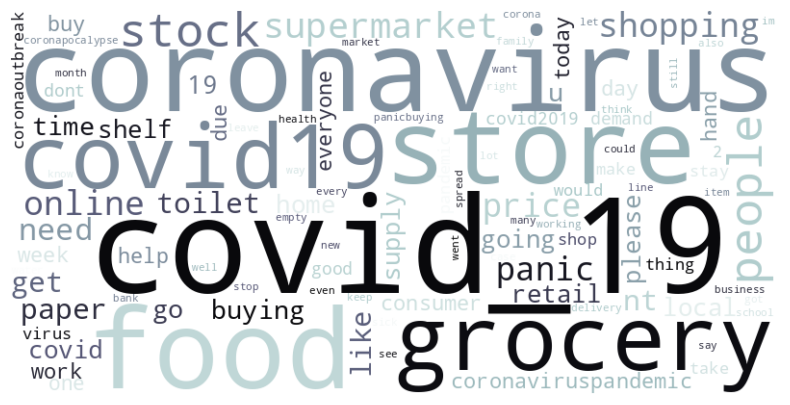

In [78]:
# Unigram word cloud
wordcloud = w.WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='bone_r').generate_from_frequencies(word_counts)
plot.figure(figsize=(10, 5))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')  # Hide axes
plot.show()

In [79]:
# Save the word cloud image - test 
wordcloud_image = wordcloud.to_image()  # Get a Pillow image from the WordCloud
wordcloud_image.save('wordcloud.png')  # Save the image as a PNG file

# Optionally, display the saved image
wordcloud_image.show()

In [80]:
# Twogram wordcloud creation, initial vectorization
twovectorizer = CountVectorizer(ngram_range=(2, 2))

In [81]:
# Create a pandas dataframe
word_count_frame = pd.DataFrame(word_counts.items() , columns=['word', 'count']).sort_values(by='count', ascending=False)
print(word_count_frame)


              word  count
68        covid_19   1536
32     coronavirus   1496
45            food   1342
202          store   1204
201        grocery    882
...            ...    ...
6173      dougquan      1
6172          20ys      1
6171      knocking      1
6169           313      1
11763     endusers      1

[11764 rows x 2 columns]


In [82]:
# Vectorization and unzipping of twodngram
twongrammed = twovectorizer.fit_transform([' '.join(lemmatized_tweets)])
twogrammed_unzipped = {key.replace(' ', '-'): value for key, value in zip(twovectorizer.get_feature_names_out(), twongrammed.toarray().sum(axis=0))}
print(twogrammed_unzipped)

{'000-people': 3, '0095-going': 1, '00i-100': 1, '01-alameda': 1, '01-indoors': 1, '0106-contact': 1, '02027790000202628233-info': 1, '03-europiece': 1, '03162020-coronavirus': 1, '038-222': 1, '0558234767-affordable': 1, '07-united': 1, '0722-904': 1, '0723212218-0751670284': 1, '0751670284-domorewithmpesa': 1, '080-gallon': 1, '0800-80': 1, '0808-164': 1, '0900-1800': 1, '099-comedy': 1, '0calamity-rebelemg': 1, '10-15': 1, '10-20': 1, '10-bottle': 1, '10-dollar': 1, '10-even': 1, '10-farmersjournal': 1, '10-federal': 1, '10-give': 1, '10-hurry': 1, '10-ie': 1, '10-intelligent': 1, '10-iu': 1, '10-lb': 1, '10-million': 1, '10-min': 1, '10-pack': 1, '10-paid': 1, '10-people': 4, '10-pharmacy': 1, '10-pm': 1, '10-price': 1, '10-roll': 1, '10-since': 1, '10-spend': 1, '10-survival': 1, '10-tax': 1, '10-value': 1, '10-year': 1, '100-000': 3, '100-1000': 1, '100-alcohol': 1, '100-buy': 1, '100-glanbia': 1, '100-medium': 1, '100-natural': 2, '100-people': 5, '100-pound': 1, '100-ppl': 1, '

In [83]:
# 2gram
twongrammed_df = pd.DataFrame(twogrammed_unzipped.items(), columns=['2-gram', 'Count']).sort_values(by='Count', ascending=False)
print(twongrammed_df)

                    2-gram  Count
21909        grocery-store    717
49895         toilet-paper    309
33366      online-shopping    220
45666           stock-food    219
10962             covid-19    201
...                    ...    ...
19387            food-weve      1
19388  food-whereghanaeats      1
19389           food-whole      1
19391         food-wineday      1
54970        zástupce-vech      1

[54971 rows x 2 columns]


In [85]:
# 3gram vectorization - unzipping and visualization
threegrammer = CountVectorizer(ngram_range=(3, 3))
threegrammed = threegrammer.fit_transform([' '.join(lemmatized_tweets)])
threegrammed_unzipped = {key.replace(' ', '-'): value for key, value in zip(threegrammer.get_feature_names_out(), threegrammed.toarray().sum(axis=0))}

threegrammed_df = pd.DataFrame(threegrammed_unzipped.items(), columns=['3-gram', 'Count']).sort_values(by='Count', ascending=False)
print(threegrammed_df)

                             3-gram  Count
35019           local-grocery-store     59
66234            went-grocery-store     39
26283              go-grocery-store     31
24238             food-toilet-paper     29
42441               paid-sick-leave     28
...                             ...    ...
23071            focus-saving-going      1
23072             focus-saving-life      1
23073  focused-coordinated-response      1
23074               foh-ill-concoct      1
68277      zástupce-vech-obchodních      1

[68278 rows x 2 columns]


In [86]:
# Create 2gram cloud
wordcloud_2gram = w.WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='bone_r').generate_from_frequencies(twogrammed_unzipped)


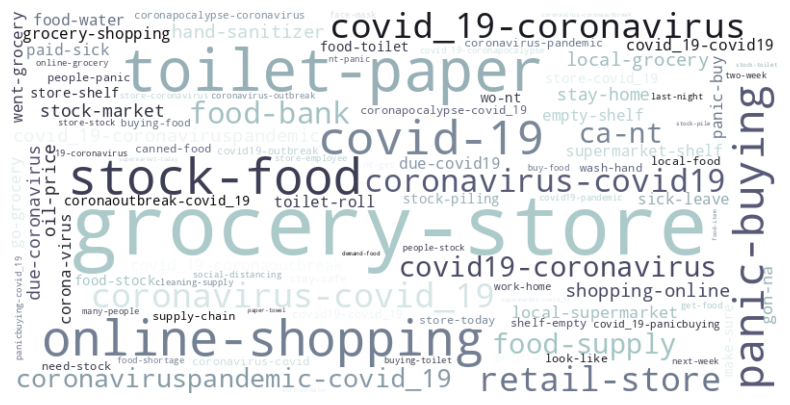

In [87]:
# Plot 2ngram wordcloud
plot.figure(figsize=(10, 5))
plot.imshow(wordcloud_2gram, interpolation='bilinear')
plot.axis('off')  # Hide axes
plot.show()

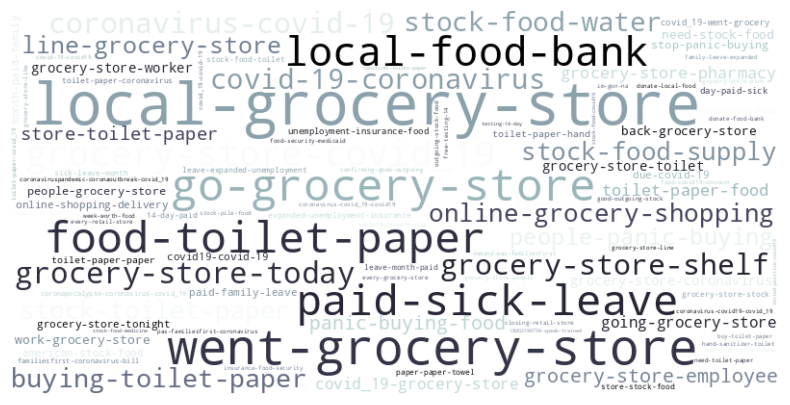

In [65]:
# Create and Plot 3ngram wordcloud

wordcloud_3gram = w.WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='bone_r').generate_from_frequencies(threegrammed_unzipped)


plot.figure(figsize=(10, 5))
plot.imshow(wordcloud_3gram, interpolation='bilinear')
plot.axis('off')  # Hide axes
plot.show()
